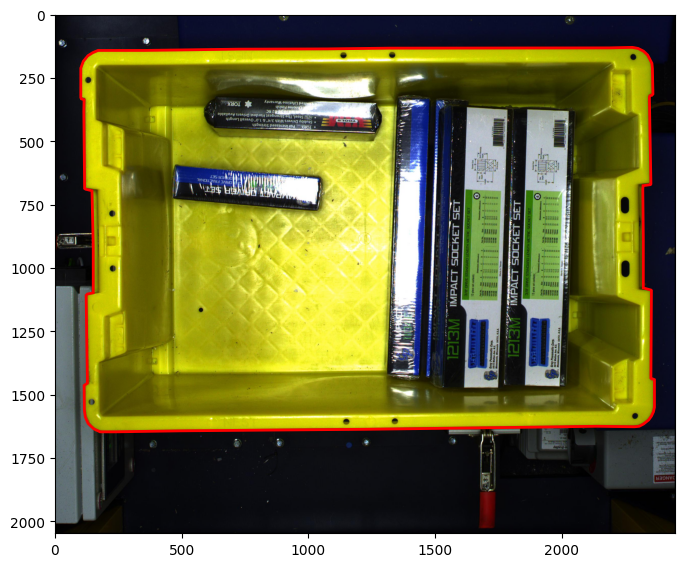

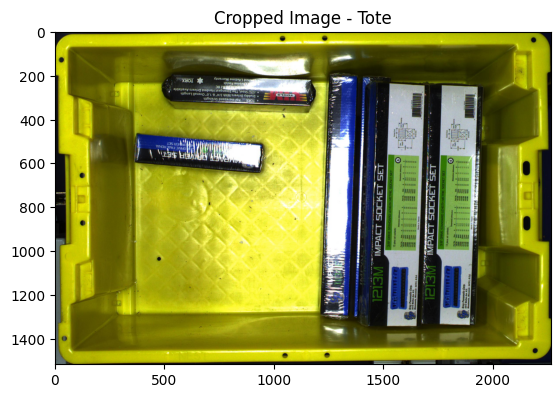

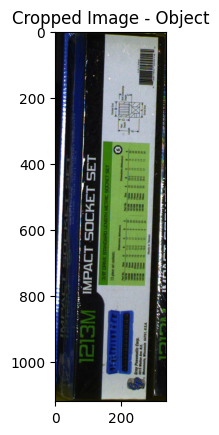

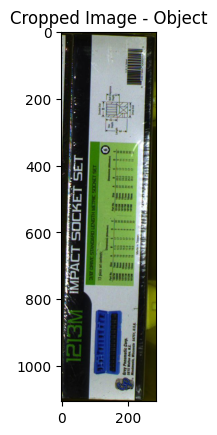

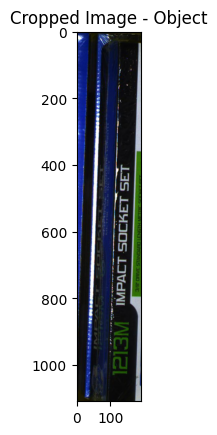

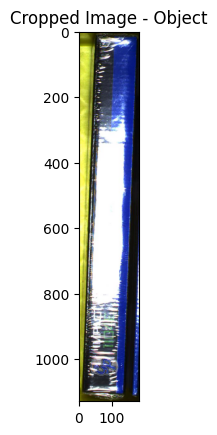

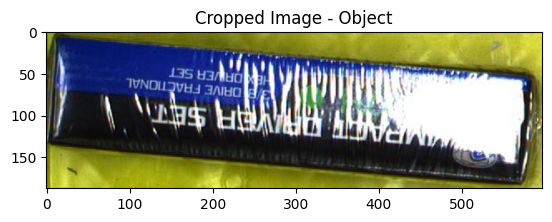

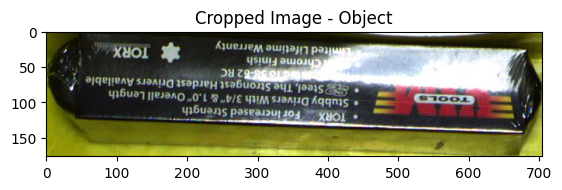

In [16]:
import os
import json
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def crop_image_with_annotation(image_path, annotation):
    im = Image.open(image_path)
    width, height = im.size

    plt.figure(figsize=(8, 8))
    ax = plt.subplot(1, 1, 1)
    plt.imshow(im)

    for shape in annotation['shapes']:
        label = shape['label']
        points = shape['points']
        
        # Convert the points to pixel coordinates
        points_pixel = [(int(x), int(y)) for x, y in points]
        
        # Draw a polygon
        polygon = patches.Polygon(points_pixel, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(polygon)
        
        # Crop the image based on the bounding box
        min_x, min_y = min(points_pixel, key=lambda p: p[0])[0], min(points_pixel, key=lambda p: p[1])[1]
        max_x, max_y = max(points_pixel, key=lambda p: p[0])[0], max(points_pixel, key=lambda p: p[1])[1]
        im_cropped = im.crop((min_x, min_y, max_x, max_y))
        
        plt.figure()
        plt.imshow(im_cropped)
        plt.title(f"Cropped Image - {label}")
        plt.show()

# Path to the JSON file containing annotation data
json_file_path = "/home/asma/Desktop/objExt/0B6J7OHE2S.json"  # Replace this with the actual path to your JSON file

# Load annotation data from the JSON file
with open(json_file_path, 'r') as json_file:
    annotation = json.load(json_file)

# Path to the corresponding image
image_path = "/home/asma/Desktop/objExt/0B6J7OHE2S.jpg"  # Replace this with the actual path to your image

# Crop the image with the annotation and visualize
crop_image_with_annotation(image_path, annotation)


In [18]:
# Crop and save objects of one image
import os
from PIL import Image
import json

def crop_and_save_objects(image_path, annotation, output_folder):
    im = Image.open(image_path)
    width, height = im.size

    for i, shape in enumerate(annotation['shapes']):
        label = shape['label']
        points = shape['points']

        # Convert the points to pixel coordinates
        points_pixel = [(int(x), int(y)) for x, y in points]

        # Crop the image based on the bounding box
        min_x, min_y = min(points_pixel, key=lambda p: p[0])[0], min(points_pixel, key=lambda p: p[1])[1]
        max_x, max_y = max(points_pixel, key=lambda p: p[0])[0], max(points_pixel, key=lambda p: p[1])[1]
        im_cropped = im.crop((min_x, min_y, max_x, max_y))

        # Save the cropped object
        output_path = os.path.join(output_folder, f"{label}_object_{i + 1}.jpg")
        im_cropped.save(output_path)

# Path to the JSON file containing annotation data
json_file_path = "/home/asma/Desktop/objExt/0B6J7OHE2S.json"  # Replace this with the actual path to your JSON file

# Load annotation data from the JSON file
with open(json_file_path, 'r') as json_file:
    annotation = json.load(json_file)

# Path to the corresponding image
image_path = "/home/asma/Desktop/objExt/0B6J7OHE2S.jpg"  # Replace this with the actual path to your image

# Output folder to save the cropped objects
output_folder = "/home/asma/Desktop/objExt/out"  # Replace this with the desired output folder

# Ensure the output folder exists, create it if necessary
os.makedirs(output_folder, exist_ok=True)

# Crop the image with the annotation and save the objects
crop_and_save_objects(image_path, annotation, output_folder)


In [1]:
#loop through all images and their annotations

import os
from PIL import Image
import json
import uuid  # Add this import for generating unique identifiers

def crop_and_save_objects(image_path, annotation, output_folder):
    im = Image.open(image_path)
    width, height = im.size

    for i, shape in enumerate(annotation['shapes']):
        label = shape['label']
        points = shape['points']

        # Convert the points to pixel coordinates
        points_pixel = [(int(x), int(y)) for x, y in points]

        # Crop the image based on the bounding box
        min_x, min_y = min(points_pixel, key=lambda p: p[0])[0], min(points_pixel, key=lambda p: p[1])[1]
        max_x, max_y = max(points_pixel, key=lambda p: p[0])[0], max(points_pixel, key=lambda p: p[1])[1]
        im_cropped = im.crop((min_x, min_y, max_x, max_y))

        # Generate a unique identifier for each cropped object
        unique_id = str(uuid.uuid4())[:8]

        # Save the cropped object with the name of the original image and unique identifier
        image_name = os.path.splitext(os.path.basename(image_path))[0]
        output_path = os.path.join(output_folder, f"{image_name}_{label}_obj{i + 1}_{unique_id}.jpg")
        im_cropped.save(output_path)

# Rest of the code remains unchanged


images_folder = "/home/asma/Desktop/github/object extraction/using same object/same-object-transfer-set/images"  # Replace this with the actual path to your images folder

# Folder containing annotation files
annotations_folder = "/home/asma/Desktop/github/object extraction/using same object/same-object-transfer-set/annotations"  # Replace this with the actual path to your annotations folder

# Output folder to save the cropped objects
output_folder = "/home/asma/Desktop/github/object extraction/using same object/same-object-transfer-set/out"  # Replace this with the desired output folder

# Ensure the output folder exists, create it if necessary
os.makedirs(output_folder, exist_ok=True)

# Loop through all images in the images folder
for image_file in os.listdir(images_folder):
    if image_file.endswith(".jpg"):
        # Construct the paths for the current image and its corresponding annotation
        image_path = os.path.join(images_folder, image_file)
        annotation_path = os.path.join(annotations_folder, os.path.splitext(image_file)[0] + ".json")

        # Check if the annotation file exists
        if os.path.exists(annotation_path):
            # Load annotation data from the JSON file
            with open(annotation_path, 'r') as json_file:
                annotation = json.load(json_file)

            # Crop the image with the annotation and save the objects
            crop_and_save_objects(image_path, annotation, output_folder)
